# Final Project - Introduction to Machine Learning

**Professor: Camille Van Hoffelen**

**Submission by: Mohammed Ahmad**

**University: Ilia State University**

This is a **regression task**. To predict a person's medical insurance costs, using tabular data.
[dataset url](https://introduction-to-machine-learning-ilia-university.s3.eu-west-2.amazonaws.com/final_project/medical_insurance.csv)

The data can be found under assignments/final project/medical_insurance.csv. By running the cell below to get an overview of the dataset:

# Prerequisites:

The Final project is attached with the "Dataset" folder and .Pipfile, which could be setup by the virtual environment.

For that to happen we need **pip** install in our integrated terminal/ubuntu 18.04 LTS depending on the OS of the user, and the **pyenv** to its latest or beta version. 

which is done by this command, **pip install -U pipenv==2020.4.1b1**

If any error pops up we will use **wheel** by, *pip install wheel*

**Required packages are to be installed for this project to run properly such as**,

TensorFlow: pip install tensorflow (*which runs on the latest pyenv, so its essential*)

Pandas: pip install pandas

NumPy : pip install numpy

Seaborn : pip install seaborn

Sklearn : pip install scipy scikit-learn (Sklearn installs scipy as well, no worries)

Keras : pip install keras

**The project commences, with first looking into the preview of the dataset by importing pandas and numpy**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Dataset/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Descriptive statistics including those that summarize the central tendency, data distribution and shape of a dataset’s distribution, excluding NaN values.

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Looking into the dataset for any null values if any.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Great! no missing values in our dataset. For to visualise our dataset comprehensively, as stated in the project details we will be visualising the difference/influence or relationship between the columns with a specific column charges. In  other words all the health, age, region aspects are to be compared with the cost of the medical insurance to get an idea of our dataset.

Let's start with bmi which refers to Body Mass Index(by taking the ratio of the fat percentage of a person with their height), to check if a person falls in the criteria of Over-weight,healthy or Under-weight, by above 30 bmi being overweight or even obese and less than 18.5 being Under-weight, by a reliable source from [BMI](https://www.cdc.gov/healthyweight/assessing/index.html). Let us check if being overweight affects our cost in health insurance or not (subjective choice in taking this comparison).

The code cell below which makes a new df column in our dataset from the bmi, called the *bmi_binary*. As name suggests for the data visualisation to be visualised with any confusion or eye strain because of the graph being too all over the place, we will make it into binary numbers as 0's and 1's. With the reference point being (>30 bmi). with this we could check the person n our dataset who is Over-weight.

*In the coming graphs there will be an example of the initial bmi column compared with costs and the one we made with bmi_binary column, the difference is perceptible*

In [5]:
def bmi_analysis(column):
    values = []
    for row in column:
        if row > 30:
            values.append(1)
        else:
            values.append(0)
    return values

In [6]:
df["bmi_binary"] = bmi_analysis(df["bmi"])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_binary
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


When it came to Bmi the making of a new column for easier data visualisation was in mind. Here, in the below cell the initial column has no such issues, instead I was having some issues in the model experiments as the values of *smoker* being a string and not a numerical value. I have no clue.

In [7]:
def smoker_analysis(column):
    values = []
    for row in column:
        if row == "yes":
            values.append(1)
        else:
            values.append(0)
    return values

In [8]:
df["smoker_rank"] = smoker_analysis(df["smoker"])
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_binary,smoker_rank
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


Let's visualise our dataset, with influence of age on costs of medical insurance. 

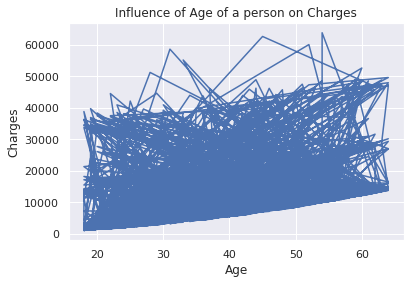

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

charges = df["charges"]
age = df["age"]

plt.plot(age, charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Influence of Age of a person on Charges')
plt.show()

We have it!  
But... it looks kind of all over the place and not pleasant. That is why we will use the scatter plot to see the data visualisation better.

Pleasant to our eyes and not haaving a stroke with the graph shown above.

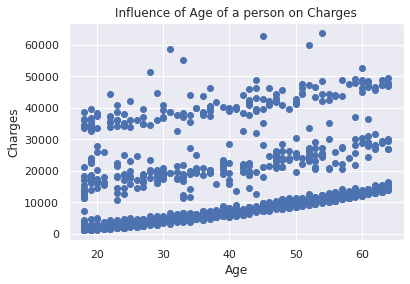

In [14]:
charges = df["charges"]
age = df["age"]

plt.scatter(age, charges)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Influence of Age of a person on Charges')
plt.show()

**Let's see if a person smoking affects their cost of medical insurance or not**, by a graph plotted below using matplotlib and seaborn.

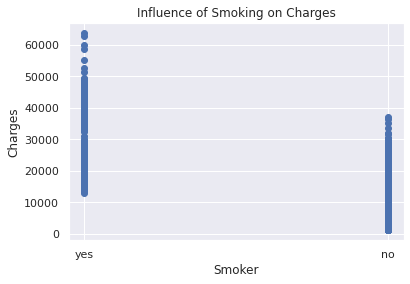

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

charges = df["charges"]
smoker = df["smoker"]
plt.scatter(smoker, charges)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Influence of Smoking on Charges')
plt.show()

Now, the reason why we made a new df column for bmi. Because the data cannot be understood properly with the graph below.

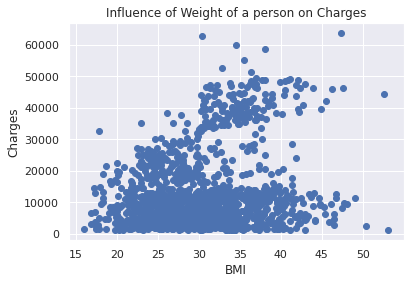

In [16]:
bmi = df["bmi"]
plt.scatter(bmi, charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Influence of Weight of a person on Charges')
plt.show()

But, with this new df column taken into account it pretty much makes sense and we can see that the influence of weight on the costs is perceptible.

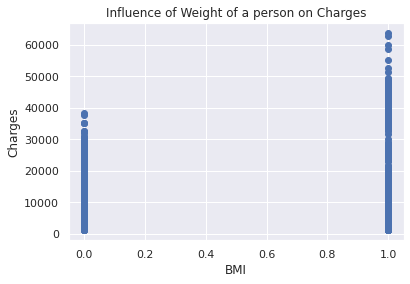

In [17]:
bmi_binary = df["bmi_binary"]
plt.scatter(bmi_binary, charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Influence of Weight of a person on Charges')
plt.show()

Some other graphs with region and sex/gender on the cost of health insurance.

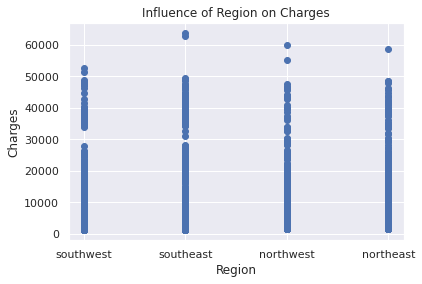

In [18]:
region = df["region"]
plt.scatter(region, charges)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Influence of Region on Charges')
plt.show()

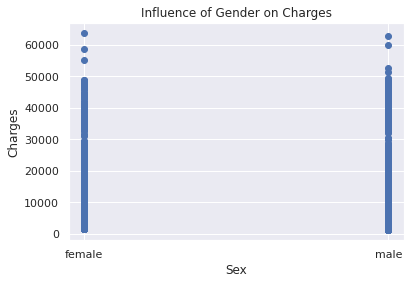

In [19]:
sex = df["sex"]
plt.scatter(sex, charges)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Influence of Gender on Charges')
plt.show()

**TRAINING SET & TEST SET**

We usually jump straight into converting this DataFrame to **features**, which we then use to *.fit()* our model. This time however, we first **split test set and training set** in a ratio of 80% train set and 20% test set. Sklearn makes this easy with the **train_test_split** function.

In [20]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.20, random_state=777)
print(f'total size: {len(df)}, train set size: {len(train_df)}, test set size: {len(test_df)}')

total size: 1338, train set size: 1070, test set size: 268


The training and test set is sent to the .csv file. Now, We choose to "set aside" the test set for later use. This prevents us from accidentally using data for the training of models and during development. The test set will be used in the end as seen in the project

In [21]:
train_df.to_csv('Dataset/medical_insurance_trainset.csv', index=False)
test_df.to_csv('Dataset/medical_insurance_testset.csv', index=False)

With this, we will use the Training set as our main Dataframe for further experiments. 

In [22]:
df = pd.read_csv('Dataset/medical_insurance_trainset.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=4242)
print(f'Size of Trainset: {len(train_df)}, Size of Validation Set: {len(val_df)}')

Size of Trainset: 856, Size of Validation Set: 214


We choose to split further into validation set, meaning we won't save it to disk like the test set. This is fine, because validation sets can be reused.
i.e Our results won't be statistically compromised, if the split isn't the same for each round of experiments.

# First Model: Linear Regression

Linear regression solves regression tasks, while logistic regression solves classification tasks. ANd as we are doing a regression task, we will choose the obvious model. In linear regression, the outcome is continuous, which satisfies with out charges of the medical insurance dataset, which is continuous.

In [23]:
from sklearn.linear_model import LinearRegression #import linear regression model
from sklearn.metrics import r2_score, mean_squared_error
def to_features(df):
    X = df[['age', 'bmi_binary', 'smoker_rank']].values
    return X

def to_label(df):
    Y = df['charges'].values
    return Y

The features and the variable of the model given above. I have created a function for the features and the label as we have a training set dataframe to work with now. Which is split into **Training set** and the **Validation set**. Which was confusing to do with the conventional X and y way. So by this function creation we could make features and labels for both validation and training set, as shown below.

In [24]:
feat_train = to_features(train_df)
label_train = to_label(train_df)

feat_val = to_features(val_df)
label_val = to_label(val_df)

Now, lets train our regression model with training set.

In [25]:
l_reg = LinearRegression().fit(feat_train, label_train)

In [26]:
l_reg.score(feat_val, label_val)

0.7019433513760993

The regression score is 0.70 approx, which is really good, as R^2 optimal score is *1.0*, and we are very close.
Let's train the next model.

# Second Model: Random Forest Regression

Random forests are an ensemble of decision trees, they can solve regression tasks. They do so by using variance reduction instead of homogeneity metrics to split each node, and by assigning numerical values to each leaf node.

The first step would be to make and design our decision tree which would be done as follows. Our features and labels are already designed and can be used here. Some essentials to the Random Forest Regressor, the values have been adjusted over many trial and errors and this specific values worked like n_estimators(number of trees in our randomized forest) and the min_samples_leaf(Minimum Samples per Leaf).

Training our Random Forest Regressor Model with the Training Set.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rfreg = RandomForestRegressor(random_state = 322, n_estimators = 150, min_samples_leaf = 8)
random_forest = rfreg.fit(feat_train, label_train)

Checking the accuracy of the Random Forest model by using the Sklearn's metrics and our validation set.

In [59]:
random_forest.score(feat_val, label_val)

0.8000052406626896

Damn! 0.80 is not bad, but I think we can do better with the 3rd model, or not.....

# Third Model: Neural Networks

Keras is an API. It is just a friendly interface to work with neural networks, and doesn't specify the implementations. Therefore, keras must always be used with a backend to do the mathematical heavy lifting. We will use tensorflow as our keras backend.

Sequential is a model allowing stacking of layers in a Neural Network.

Dense allows to instate and manipulate the layers in a Neural Network.

Training our Neural Network with Hyperparameters and Optimizers relevant to Linear Regression. The values are adjusted for "precise" data visualisation

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error
model_nn = Sequential([
    Dense(19, activation='relu', input_dim = 3),
    Dense(19, activation='relu'),
    Dense(19, activation='relu'),
    Dense(1)
])

model_nn.compile(
    loss= 'mean_squared_error',
    optimizer= 'adam'
)

import tensorflow as tf

np.random.seed(322)
tf.random.set_seed(200)
history = model_nn.fit(feat_train, label_train, epochs=700)

Epoch 1/700
27/27 [==============================] - 0s 2ms/step - loss: 305308064.0000
Epoch 2/700
27/27 [==============================] - 0s 2ms/step - loss: 304838496.0000
Epoch 3/700
27/27 [==============================] - 0s 2ms/step - loss: 303984288.0000
Epoch 4/700
27/27 [==============================] - 0s 2ms/step - loss: 302373984.0000
Epoch 5/700
27/27 [==============================] - 0s 3ms/step - loss: 299370144.0000
Epoch 6/700
27/27 [==============================] - 0s 2ms/step - loss: 294236768.0000
Epoch 7/700
27/27 [==============================] - 0s 2ms/step - loss: 285705376.0000
Epoch 8/700
27/27 [==============================] - 0s 2ms/step - loss: 272840960.0000
Epoch 9/700
27/27 [==============================] - 0s 2ms/step - loss: 254602960.0000
Epoch 10/700
27/27 [==============================] - 0s 2ms/step - loss: 230920080.0000
Epoch 11/700
27/27 [==============================] - 0s 2ms/step - loss: 204356640.0000
Epoch 12/700
27/27 [==========

27/27 [==============================] - 0s 2ms/step - loss: 118031624.0000
Epoch 93/700
27/27 [==============================] - 0s 2ms/step - loss: 117928608.0000
Epoch 94/700
27/27 [==============================] - 0s 2ms/step - loss: 117768352.0000
Epoch 95/700
27/27 [==============================] - 0s 3ms/step - loss: 117590032.0000
Epoch 96/700
27/27 [==============================] - 0s 2ms/step - loss: 117449008.0000
Epoch 97/700
27/27 [==============================] - 0s 2ms/step - loss: 117394888.0000
Epoch 98/700
27/27 [==============================] - 0s 2ms/step - loss: 117150768.0000
Epoch 99/700
27/27 [==============================] - 0s 2ms/step - loss: 116982408.0000
Epoch 100/700
27/27 [==============================] - 0s 2ms/step - loss: 116804416.0000
Epoch 101/700
27/27 [==============================] - 0s 2ms/step - loss: 116665688.0000
Epoch 102/700
27/27 [==============================] - 0s 7ms/step - loss: 116540608.0000
Epoch 103/700
27/27 [==========

27/27 [==============================] - 0s 2ms/step - loss: 66428084.0000
Epoch 184/700
27/27 [==============================] - 0s 2ms/step - loss: 64815252.0000
Epoch 185/700
27/27 [==============================] - 0s 2ms/step - loss: 63400708.0000
Epoch 186/700
27/27 [==============================] - 0s 2ms/step - loss: 61670228.0000
Epoch 187/700
27/27 [==============================] - 0s 2ms/step - loss: 60200812.0000
Epoch 188/700
27/27 [==============================] - 0s 2ms/step - loss: 58590572.0000
Epoch 189/700
27/27 [==============================] - 0s 2ms/step - loss: 57300352.0000
Epoch 190/700
27/27 [==============================] - 0s 2ms/step - loss: 55501256.0000
Epoch 191/700
27/27 [==============================] - 0s 2ms/step - loss: 54065716.0000
Epoch 192/700
27/27 [==============================] - 0s 2ms/step - loss: 52660592.0000
Epoch 193/700
27/27 [==============================] - 0s 2ms/step - loss: 51173480.0000
Epoch 194/700
27/27 [==============

27/27 [==============================] - 0s 2ms/step - loss: 26577042.0000
Epoch 275/700
27/27 [==============================] - 0s 2ms/step - loss: 26450808.0000
Epoch 276/700
27/27 [==============================] - 0s 2ms/step - loss: 26375026.0000
Epoch 277/700
27/27 [==============================] - 0s 2ms/step - loss: 26340416.0000
Epoch 278/700
27/27 [==============================] - 0s 2ms/step - loss: 26291034.0000
Epoch 279/700
27/27 [==============================] - 0s 2ms/step - loss: 26265212.0000
Epoch 280/700
27/27 [==============================] - 0s 2ms/step - loss: 26167902.0000
Epoch 281/700
27/27 [==============================] - 0s 2ms/step - loss: 26114208.0000
Epoch 282/700
27/27 [==============================] - 0s 2ms/step - loss: 26073954.0000
Epoch 283/700
27/27 [==============================] - 0s 2ms/step - loss: 26003624.0000
Epoch 284/700
27/27 [==============================] - 0s 2ms/step - loss: 26103160.0000
Epoch 285/700
27/27 [==============

27/27 [==============================] - 0s 2ms/step - loss: 21605440.0000
Epoch 367/700
27/27 [==============================] - 0s 2ms/step - loss: 21524604.0000
Epoch 368/700
27/27 [==============================] - 0s 2ms/step - loss: 21442266.0000
Epoch 369/700
27/27 [==============================] - 0s 2ms/step - loss: 21446998.0000
Epoch 370/700
27/27 [==============================] - 0s 2ms/step - loss: 21336710.0000
Epoch 371/700
27/27 [==============================] - 0s 2ms/step - loss: 21347788.0000
Epoch 372/700
27/27 [==============================] - 0s 2ms/step - loss: 21253632.0000
Epoch 373/700
27/27 [==============================] - 0s 2ms/step - loss: 21274976.0000
Epoch 374/700
27/27 [==============================] - 0s 2ms/step - loss: 21217984.0000
Epoch 375/700
27/27 [==============================] - 0s 2ms/step - loss: 21161736.0000
Epoch 376/700
27/27 [==============================] - 0s 2ms/step - loss: 21169240.0000
Epoch 377/700
27/27 [==============

27/27 [==============================] - 0s 2ms/step - loss: 18977226.0000
Epoch 459/700
27/27 [==============================] - 0s 2ms/step - loss: 18952874.0000
Epoch 460/700
27/27 [==============================] - 0s 2ms/step - loss: 18908212.0000
Epoch 461/700
27/27 [==============================] - 0s 2ms/step - loss: 18917746.0000
Epoch 462/700
27/27 [==============================] - 0s 2ms/step - loss: 18861780.0000
Epoch 463/700
27/27 [==============================] - 0s 2ms/step - loss: 18862962.0000
Epoch 464/700
27/27 [==============================] - 0s 3ms/step - loss: 18889712.0000
Epoch 465/700
27/27 [==============================] - 0s 2ms/step - loss: 18927052.0000
Epoch 466/700
27/27 [==============================] - 0s 2ms/step - loss: 18841486.0000
Epoch 467/700
27/27 [==============================] - 0s 2ms/step - loss: 18853416.0000
Epoch 468/700
27/27 [==============================] - 0s 2ms/step - loss: 18874286.0000
Epoch 469/700
27/27 [==============

27/27 [==============================] - 0s 2ms/step - loss: 18307884.0000
Epoch 551/700
27/27 [==============================] - 0s 2ms/step - loss: 18278688.0000
Epoch 552/700
27/27 [==============================] - 0s 2ms/step - loss: 18359108.0000
Epoch 553/700
27/27 [==============================] - 0s 2ms/step - loss: 18359924.0000
Epoch 554/700
27/27 [==============================] - 0s 2ms/step - loss: 18297318.0000
Epoch 555/700
27/27 [==============================] - 0s 2ms/step - loss: 18364316.0000
Epoch 556/700
27/27 [==============================] - 0s 2ms/step - loss: 18282048.0000
Epoch 557/700
27/27 [==============================] - 0s 2ms/step - loss: 18288430.0000
Epoch 558/700
27/27 [==============================] - 0s 2ms/step - loss: 18293868.0000
Epoch 559/700
27/27 [==============================] - 0s 2ms/step - loss: 18252728.0000
Epoch 560/700
27/27 [==============================] - 0s 2ms/step - loss: 18453964.0000
Epoch 561/700
27/27 [==============

27/27 [==============================] - 0s 2ms/step - loss: 18211050.0000
Epoch 643/700
27/27 [==============================] - 0s 2ms/step - loss: 18288376.0000
Epoch 644/700
27/27 [==============================] - 0s 6ms/step - loss: 18210482.0000
Epoch 645/700
27/27 [==============================] - 0s 2ms/step - loss: 18241288.0000
Epoch 646/700
27/27 [==============================] - 0s 3ms/step - loss: 18202946.0000
Epoch 647/700
27/27 [==============================] - 0s 2ms/step - loss: 18278342.0000
Epoch 648/700
27/27 [==============================] - 0s 2ms/step - loss: 18194592.0000
Epoch 649/700
27/27 [==============================] - 0s 2ms/step - loss: 18171820.0000
Epoch 650/700
27/27 [==============================] - 0s 7ms/step - loss: 18188776.0000
Epoch 651/700
27/27 [==============================] - 0s 2ms/step - loss: 18152398.0000
Epoch 652/700
27/27 [==============================] - 0s 2ms/step - loss: 18152086.0000
Epoch 653/700
27/27 [==============

**Now lets see the Epoch loss curve to see the gradient descent of our loss**

Text(0.5, 1.0, 'Epoch Loss Curve')

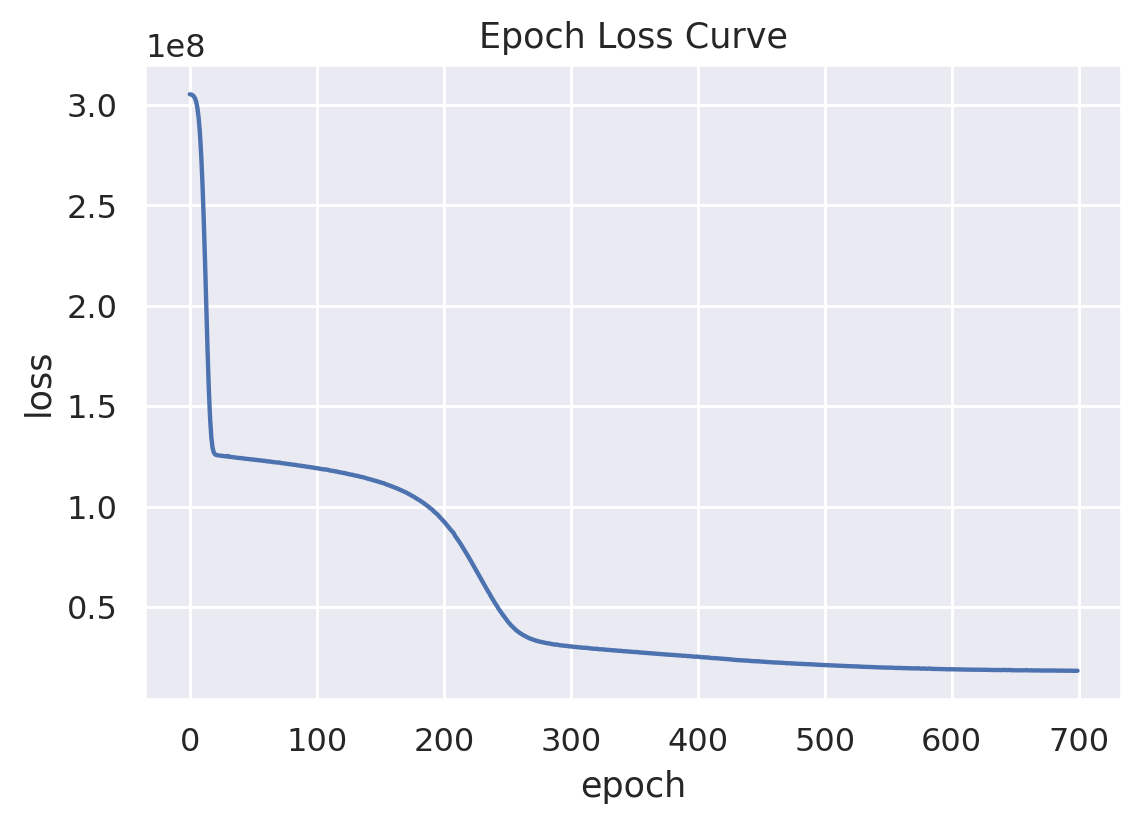

In [66]:
loss = history.history['loss']

fig = plt.figure(dpi = 210)
ax = fig.add_subplot(111)
ax.plot(loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('Epoch Loss Curve')

Using the R^2 score of the validation and the training set, lets obtain the accuracy of the predictions.

In [67]:
from sklearn.metrics import r2_score

training_pred_nn = model_nn.predict(feat_train)
val_pred_nn = model_nn.predict(feat_val)

print("R2 score of training set:\t{:0.5f}".format(r2_score(label_train, training_pred_nn)))
print("R2 score of validation set:\t{:0.5f}".format(r2_score(label_val, val_pred_nn)))

R2 score of training set:	0.86947
R2 score of validation set:	0.79945


The information obtained tells us that the R^2 score of our neural network has much greater range than the previous two models from the training and validation sets respectively.

Now, it's time to bring the test set back. We will find the R^2 score of the test set, of all the 3 models respectively.

In [68]:
test_df = pd.read_csv('Dataset/medical_insurance_trainset.csv')

feat_test = to_features(test_df)
label_test = to_label(test_df)

linear_reg_test_accuracy = l_reg.score(feat_test, label_test)
rfreg_test_accuracy = random_forest.score(feat_test, label_test)

test_pred_nn = model_nn.predict(feat_test)
nn_test_accuracy = r2_score(label_test, test_pred_nn)

print("R^2 score of Linear Regression on Test Set is:\t{:0.5f}".format(linear_reg_test_accuracy))
print("R^2 score of Random Forest on Test Set is:\t{:0.5f}".format(rfreg_test_accuracy))
print("R^2 score of Neural Network on Test Set is:\t{:0.5f}".format(nn_test_accuracy))


R^2 score of Linear Regression on Test Set is:	0.74594
R^2 score of Random Forest on Test Set is:	0.86378
R^2 score of Neural Network on Test Set is:	0.85422



With respect to this, the best model fitting the regression prediction report would be the Neural Network however the Random Forest Regressor is likewise quite close.

# La Fin